# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Identify Potential Dividend Aristocrats

## Getting Started

Code bellow will load the data and get some basic information about it

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline


try:
    #load fundamentals
    fundamentals = pd.read_csv("./datasets/fundamentals.csv")
    print ("\'fundamentals.csv\' has {} samples with {} features each.".format(*fundamentals.shape))
    
    #load prices
    prices = pd.read_csv("./datasets/prices.csv")
    print ("\'prices.csv\' has {} samples with {} features each.".format(*prices.shape))
    
    #load adjusted prices
    prices_adjusted = pd.read_csv("./datasets/prices-split-adjusted.csv") 
    print ("\'prices.csv\' has {} samples with {} features each.".format(*prices_adjusted.shape))
    
    #load securities
    securities = pd.read_csv("./datasets/securities.csv")
    print ("\'securities.csv\' has {} samples with {} features each.".format(*securities.shape))
    
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

'fundamentals.csv' has 1781 samples with 79 features each.
'prices.csv' has 851264 samples with 7 features each.
'prices.csv' has 851264 samples with 7 features each.
'securities.csv' has 505 samples with 8 features each.


## Data Exploration
Let's get deeper into the data in order to analyze what is going on inside

In [3]:
# Display a description of the dataset
print("Fundamentals")
display(fundamentals.describe())
print("Prices")
display(prices.describe())
print("Prices Adjusted")
display(prices_adjusted.describe())
print("Securities")
display(securities.describe())

Fundamentals


Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1781.000000      1.781000e+03         1.781000e+03   
mean    890.000000      4.673418e+09        -6.353484e+07   
std     514.274732      1.406047e+10         7.562794e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     445.000000      5.160000e+08        -1.040000e+08   
50%     890.000000      1.334000e+09        -1.830000e+07   
75%    1335.000000      3.246000e+09         7.816000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std                  6.848143e+08     233.924028          2.979963e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.638000e+06      10.000000         -1.151200e+09   
50%                  2.000000e+06      16.000000         -3.580000e+08   
75%                  3.359200e+07      26.000000         -1.291000e+08   
max                  1.416200e+10    5789.000000          5.000000e+06   

       Capital Surplus   Cash Ratio  Cash and Cash Equivalents  \
count     1.781000e+03  1482.000000               1.781000e+03   
mean      5.351784e+09    74.457490               8.521399e+09   
std       1.133977e+10   102.298374               5.432105e+10   
min      -7.215000e+08     0.000000               2.100000e+04   
25%       4.791000e+08    17.000000               3.088000e+08   
50%       1.997080e+09    41.000000               8.625900e+08   
75%       5.735000e+09    90.000000               2.310000e+09   
max       1.082880e+11  1041.000000               7.281110e+11   

       Changes in Inventories              ...               \
count            1.781000e+03              ...                
mean            -6.787749e+07              ...                
std              3.903369e+08              ...                
min             -5.562000e+09              ...                
25%             -5.400000e+07              ...                
50%              0.000000e+00              ...                
75%              0.000000e+00              ...                
max              3.755000e+09              ...                

       Total Current Assets  Total Current Liabilities  Total Equity  \
count          1.781000e+03               1.781000e+03  1.781000e+03   
mean           6.726349e+09               4.699919e+09  1.188846e+10   
std            1.344800e+10               9.538832e+09  2.584429e+10   
min            0.000000e+00               0.000000e+00 -1.324400e+10   
25%            1.044178e+09               5.640760e+08  2.201492e+09   
50%            2.747200e+09               1.701500e+09  4.983000e+09   
75%            6.162000e+09               4.381000e+09  1.080900e+10   
max            1.396600e+11               9.028100e+10  2.562050e+11   

       Total Liabilities  Total Liabilities & Equity  Total Revenue  \
count       1.781000e+03                1.781000e+03   1.781000e+03   
mean        4.380420e+10                5.569266e+10   2.029154e+10   
std         1.817039e+11                2.033612e+11   4.095355e+10   
min         2.577000e+06                2.705000e+06   1.514000e+06   
25%         3.843300e+09                6.552689e+09   3.714000e+09   
50%         9.141000e+09                1.517000e+10   8.023200e+09   
75%         2.389700e+10                3.599710e+10   1.748600e+10   
max         2.340547e+12                2.572274e+12   4.856510e+11   

       Treasury Stock     For Year  Earnings Per Share  \
count    1.781000e+03  1608.000000         1562.000000   
mean    -3.951522e+09  2013.305348            3.353707   
std      1.407047e+10    19.953135            4.695896   
min     -2.297340e+11  1215.000000          -61.200000   
25%     -3.040895e+09  2013.000000            1.5

Prices


open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

Prices Adjusted


open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

Securities


CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06

### Remove columns
As we can see there is "Unnamed: 0" column, that is simply order number. We do not need it.

In [4]:
#drop counter column
fundamentals = fundamentals.drop(fundamentals.columns[0],1)

#leave only year in period end
for f,i in zip (fundamentals['Period Ending'],range(0,len(fundamentals))):
    fundamentals['Period Ending'][i] = f.split('/')[0]
    
#let's also drop 'For Year', since it is the same as Period Ending, but with more NaN
fundamentals = fundamentals.drop(['For Year'],1)

#Capital Surplus does not add a lot of value and have a lot NaN
fundamentals = fundamentals.drop(['Capital Surplus'],1)

#Cash Ratio can be calculated in the future and have a lot NaN
fundamentals = fundamentals.drop(['Cash Ratio'],1)

#ammost completely NaN
fundamentals = fundamentals.drop(['Deferred Asset Charges'],1)
fundamentals = fundamentals.drop(['Equity Earnings/Loss Unconsolidated Subsidiary'],1)

#irrelevant for the project:
fundamentals = fundamentals.drop(['Changes in Inventories'],1)
fundamentals = fundamentals.drop(['Deferred Liability Charges'],1)
fundamentals = fundamentals.drop(['Effect of Exchange Rate'],1)
fundamentals = fundamentals.drop(['Income Tax'],1)
fundamentals = fundamentals.drop(['Earnings Before Interest and Tax'],1)
fundamentals = fundamentals.drop(['Earnings Before Tax'],1)
fundamentals = fundamentals.drop(['Inventory'],1)
fundamentals = fundamentals.drop(['Minority Interest'],1)
fundamentals = fundamentals.drop(['Net Cash Flow-Operating'],1)
fundamentals = fundamentals.drop(['Net Cash Flows-Financing'],1)
fundamentals = fundamentals.drop(['Net Cash Flows-Investing'],1)
fundamentals = fundamentals.drop(['Net Income-Cont. Operations'],1)
fundamentals = fundamentals.drop(['Net Receivables'],1)
fundamentals = fundamentals.drop(['Non-Recurring Items'],1)
fundamentals = fundamentals.drop(['Operating Income'],1)
fundamentals = fundamentals.drop(['Operating Margin'],1)
fundamentals = fundamentals.drop(['Other Financing Activities'],1)
fundamentals = fundamentals.drop(['Other Operating Activities'],1)
fundamentals = fundamentals.drop(['Other Operating Items'],1)
fundamentals = fundamentals.drop(['Pre-Tax Margin'],1)
fundamentals = fundamentals.drop(['Pre-Tax ROE'],1)
fundamentals = fundamentals.drop(['Profit Margin'],1)
fundamentals = fundamentals.drop(['Quick Ratio'],1)
fundamentals = fundamentals.drop(['Research and Development'],1)
fundamentals = fundamentals.drop(['Short-Term Debt / Current Portion of Long-Term Debt'],1)
fundamentals = fundamentals.drop(['Short-Term Investments'],1)
fundamentals = fundamentals.drop(['Total Current Assets'],1)
fundamentals = fundamentals.drop(['Total Current Liabilities'],1)
fundamentals = fundamentals.drop(['Total Liabilities & Equity'],1)


#cannot really be negative
fundamentals['Accounts Receivable'] = abs(fundamentals['Accounts Receivable'])
fundamentals['Investments'] = abs(fundamentals['Investments'])
fundamentals['Liabilities'] = abs(fundamentals['Liabilities'])
fundamentals['Add\'l income/expense items'] = abs(fundamentals['Add\'l income/expense items'])
fundamentals['Capital Expenditures'] = abs(fundamentals['Capital Expenditures'])
fundamentals['Other Equity'] = abs(fundamentals['Other Equity'])




fundamentals.shape

c:\users\moroz\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1781, 44)

### Add labels
Lets add labels for data.

 - 1 - dividend aristocrates
 - 0 - other

In [5]:
#load dividend aristocrates list
arist = pd.read_csv("./datasets/dividend_arist.csv")

#initialize array for labels
label = []

#iterate through the dataset
for a in fundamentals['Ticker Symbol']:
    #if ticker found in 'arist', label = 1
    if a in arist.values:
        label.append(1)
    else:
        label.append(0)

#add labels to a list
#fundamentals['labels'] = arr


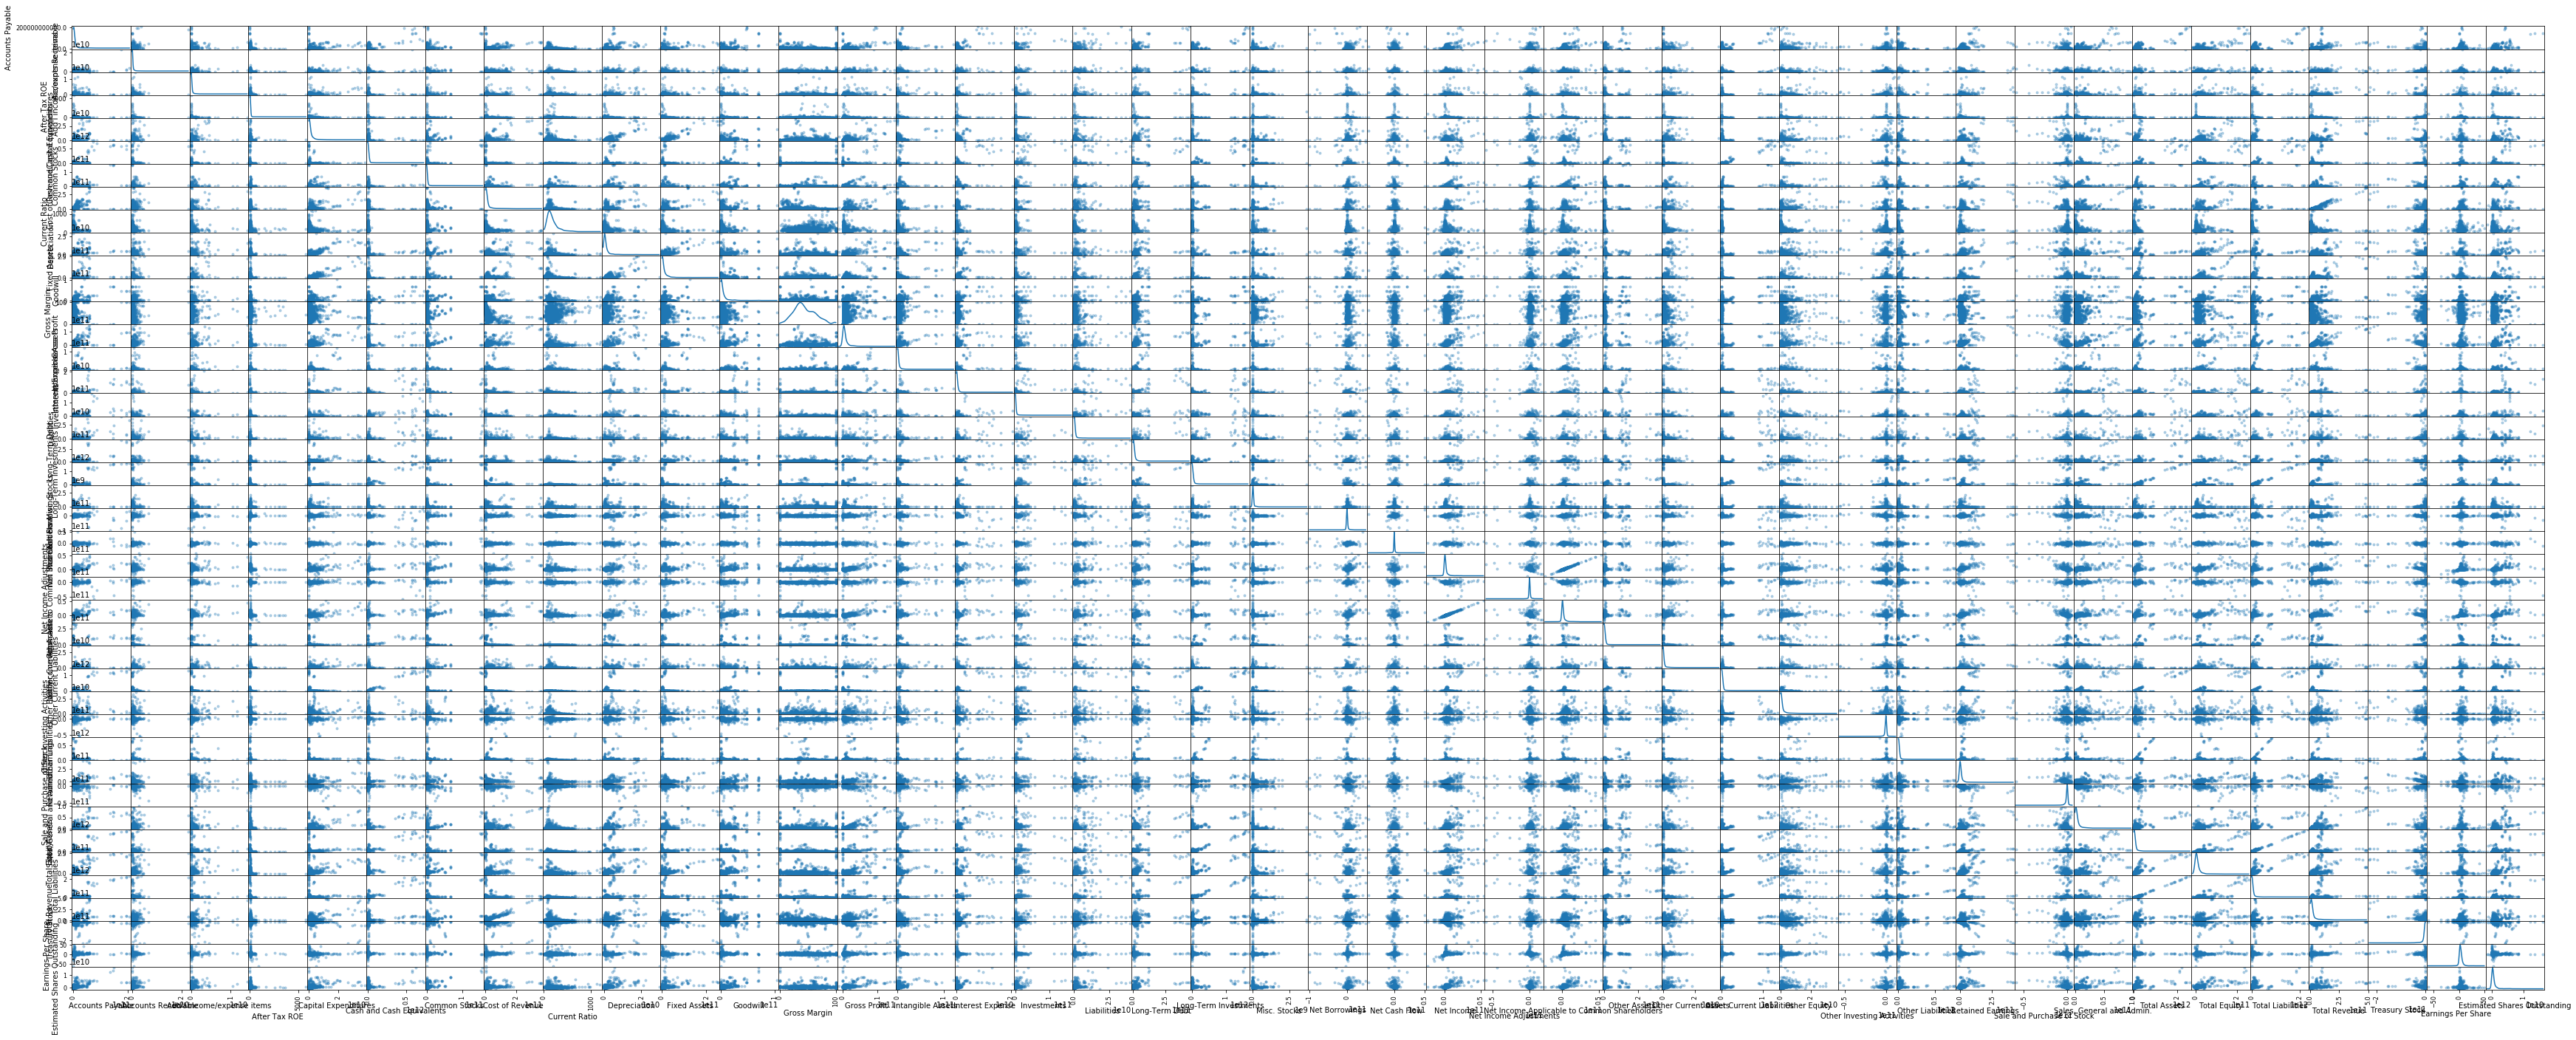

In [29]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(fundamentals, alpha = 0.3, figsize = (60,24), diagonal = 'kde');


#double click to expand

### Implementation: Feature Relevance
It seem like data is highly correlated. Let's confirm it.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#create new variable
fun = fundamentals

#drop name and period, we do not need them
fun = fun.drop(['Ticker Symbol'],1)
fun = fun.drop(['Period Ending'],1)

#replace NaN with 0
fun = pd.DataFrame.fillna(fun,0.)

#make sure we have float values
for f in fun.keys():
    for v,i in zip(fun[f],range(0,len(fun[f]))):
        fun[f][i] = float(v)

#min-max scaling
fun = MinMaxScaler().fit_transform(fun)
fun = pd.DataFrame(fun)

# drop values one by one and see how good we are in predicting it
# high score mean that it does not contribute a lot
for f in fun.keys():
    if f == 'Ticker Symbol' or f == 'Period Ending':
        continue
        
    #print(f)
    
    dropVal = f
    new_data = pd.DataFrame(fun, columns = fun.keys()).reset_index(drop = True)
    new_data.drop(dropVal, axis = 1, inplace = True)
    #print(new_data)
    lab=pd.DataFrame(fun, columns = [dropVal])

    X_train, X_test, y_train, y_test = train_test_split(new_data, lab, test_size = 0.25, random_state = 42)

    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    print(f, score)

0 0.886795912552
1 0.127397708297
2 -0.0849855867071
3 0.159824687406
4 0.914045090195
5 0.978444428929
6 -0.573733683732
7 0.979936444119
8 0.478839070978
9 0.880288544859
10 0.957867095826
11 0.74572455871
12 0.931351968527
13 0.949602675649
14 0.550759051562
15 0.576617437725
16 0.426468928441
17 -0.0356392072524
18 0.967338316849
19 0.993503413788
20 -0.338409261783
21 -0.468956733555
22 -0.434782233161
23 0.937027588435
24 0.0402839183496
25 0.937798205632
26 0.980437669249
27 -4.05754039336
28 0.993751308328
29 0.237045552089
30 -0.0246642309599
31 0.990804692048
32 0.807825828322
33 0.11433771183
34 0.921922380919
35 0.994328147811
36 0.889484628247
37 0.981320772585
38 0.987041311926
39 0.586521420414
40 0.801502344688
41 0.720361752809


### PCA


[['Explained Variance', 0.30249999999999999],
 [0, 0.2051],
 [1, 0.0465],
 [2, 0.049700000000000001],
 [3, -0.0061999999999999998],
 [4, 0.13589999999999999],
 [5, 0.19109999999999999],
 [6, 0.099099999999999994],
 [7, 0.1671],
 [8, -0.097500000000000003],
 [9, 0.15740000000000001],
 [10, 0.13270000000000001],
 [11, 0.16850000000000001],
 [12, -0.33279999999999998],
 [13, 0.21160000000000001],
 [14, 0.053600000000000002],
 [15, 0.1245],
 [16, 0.093200000000000005],
 [17, 0.1371],
 [18, 0.1555],
 [19, 0.22689999999999999],
 [20, 0.0057000000000000002],
 [21, -0.015800000000000002],
 [22, -0.0022000000000000001],
 [23, 0.13189999999999999],
 [24, -0.012500000000000001],
 [25, 0.12909999999999999],
 [26, 0.12989999999999999],
 [27, 0.047699999999999999],
 [28, 0.20150000000000001],
 [29, 0.1414],
 [30, -0.0077999999999999996],
 [31, 0.060199999999999997],
 [32, 0.15359999999999999],
 [33, -0.054600000000000003],
 [34, 0.27760000000000001],
 [35, 0.23549999999999999],
 [36, 0.3120999999999

[['Explained Variance', 0.26469999999999999],
 [0, 0.070599999999999996],
 [1, 0.021399999999999999],
 [2, 0.0252],
 [3, 0.0022000000000000001],
 [4, 0.045900000000000003],
 [5, 0.073400000000000007],
 [6, 0.027099999999999999],
 [7, -0.047699999999999999],
 [8, 0.0276],
 [9, 0.059900000000000002],
 [10, 0.037199999999999997],
 [11, 0.072099999999999997],
 [12, 0.92959999999999998],
 [13, 0.1129],
 [14, 0.042999999999999997],
 [15, 0.0654],
 [16, 0.0195],
 [17, 0.060600000000000001],
 [18, 0.098000000000000004],
 [19, 0.088300000000000003],
 [20, 0.010800000000000001],
 [21, -0.015800000000000002],
 [22, -0.0050000000000000001],
 [23, 0.046100000000000002],
 [24, 0.011599999999999999],
 [25, 0.045100000000000001],
 [26, 0.0521],
 [27, 0.0099000000000000008],
 [28, 0.082000000000000003],
 [29, 0.042099999999999999],
 [30, 0.0055999999999999999],
 [31, 0.0177],
 [32, 0.045100000000000001],
 [33, -0.016400000000000001],
 [34, 0.1099],
 [35, 0.095500000000000002],
 [36, 0.122],
 [37, 0.090

[['Explained Variance', 0.1242],
 [0, -0.069099999999999995],
 [1, 0.0115],
 [2, 0.099000000000000005],
 [3, 0.00050000000000000001],
 [4, 0.31390000000000001],
 [5, -0.24829999999999999],
 [6, -0.048500000000000001],
 [7, 0.29909999999999998],
 [8, 0.064100000000000004],
 [9, 0.23130000000000001],
 [10, 0.29409999999999997],
 [11, -0.0121],
 [12, 0.058099999999999999],
 [13, 0.25269999999999998],
 [14, 0.082400000000000001],
 [15, -0.1016],
 [16, -0.095699999999999993],
 [17, -0.092100000000000001],
 [18, -0.091200000000000003],
 [19, -0.29210000000000003],
 [20, 0.02],
 [21, 0.072099999999999997],
 [22, -0.0038999999999999998],
 [23, 0.097000000000000003],
 [24, 0.047100000000000003],
 [25, 0.1019],
 [26, -0.16569999999999999],
 [27, 0.1016],
 [28, -0.27539999999999998],
 [29, 0.0877],
 [30, -0.0276],
 [31, -0.043799999999999999],
 [32, 0.12609999999999999],
 [33, -0.1018],
 [34, 0.086800000000000002],
 [35, -0.217],
 [36, -0.035000000000000003],
 [37, -0.23449999999999999],
 [38, 0.

[['Explained Variance', 0.052400000000000002],
 [0, 0.066500000000000004],
 [1, 0.0132],
 [2, -0.0061000000000000004],
 [3, 0.0011000000000000001],
 [4, -0.034099999999999998],
 [5, 0.086199999999999999],
 [6, 0.088800000000000004],
 [7, -0.0201],
 [8, 0.91269999999999996],
 [9, -0.0023999999999999998],
 [10, -0.067900000000000002],
 [11, 0.073200000000000001],
 [12, -0.060100000000000001],
 [13, -0.0097999999999999997],
 [14, 0.0123],
 [15, 0.0132],
 [16, 0.031899999999999998],
 [17, -0.0044999999999999997],
 [18, 0.0155],
 [19, 0.021700000000000001],
 [20, -0.052400000000000002],
 [21, 0.00050000000000000001],
 [22, 0.011299999999999999],
 [23, 0.050099999999999999],
 [24, -0.020799999999999999],
 [25, 0.0487],
 [26, -0.19639999999999999],
 [27, 0.0195],
 [28, 0.0848],
 [29, -0.067599999999999993],
 [30, -0.0344],
 [31, -0.23219999999999999],
 [32, 0.011299999999999999],
 [33, -0.024500000000000001],
 [34, 0.026100000000000002],
 [35, 0.0044000000000000003],
 [36, 0.06239999999999999

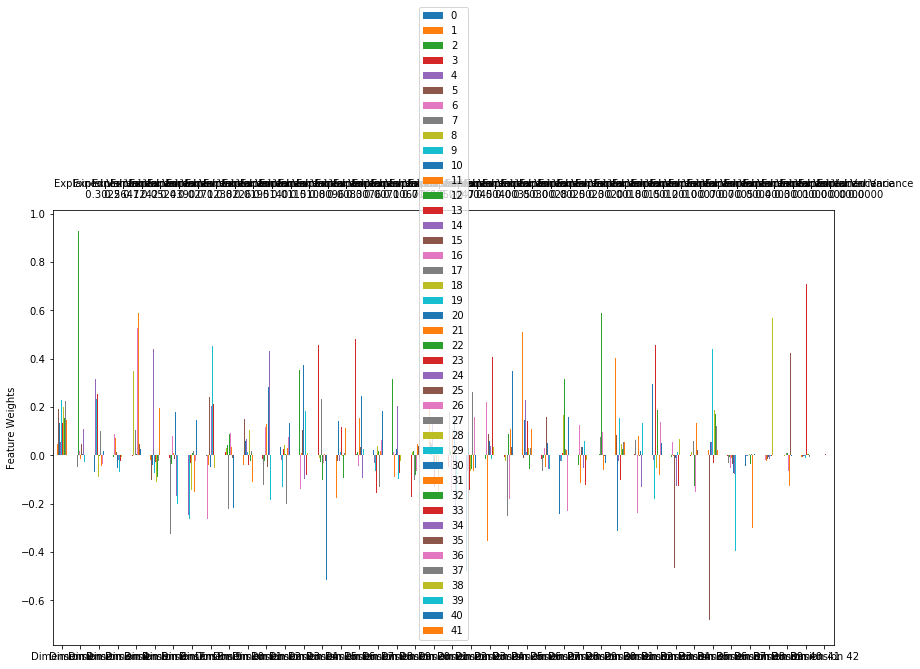

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#function from https://github.com/udacity/machine-learning/tree/master/projects/customer_segments
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)



pca = PCA().fit(fun) 

# Generate PCA results plot
pca_results = pca_results(fun, pca)


#find values for the factors per dimention
dim1=[]
dim2=[]
dim3=[]
dim4=[]

#iterate through PCA to creater arrays with information
for p in pca_results:
    for d,i in zip(pca_results[p],range(0,4)):
        if i==0:
            dim1.append([p,pca_results[p][i]])
        elif i==1:
            dim2.append([p,pca_results[p][i]])
        elif i==2:
            dim3.append([p,pca_results[p][i]])
        elif i==3:
            dim4.append([p,pca_results[p][i]])

#print PCA values
display(dim1,dim2,dim3,dim4)


### Dimensionality Reduction

Since explained variance drop significantly after 3-d PCA. That is where we stop.

In [8]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=3)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(fun)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

## Visualizing a Biplot & 3D plot


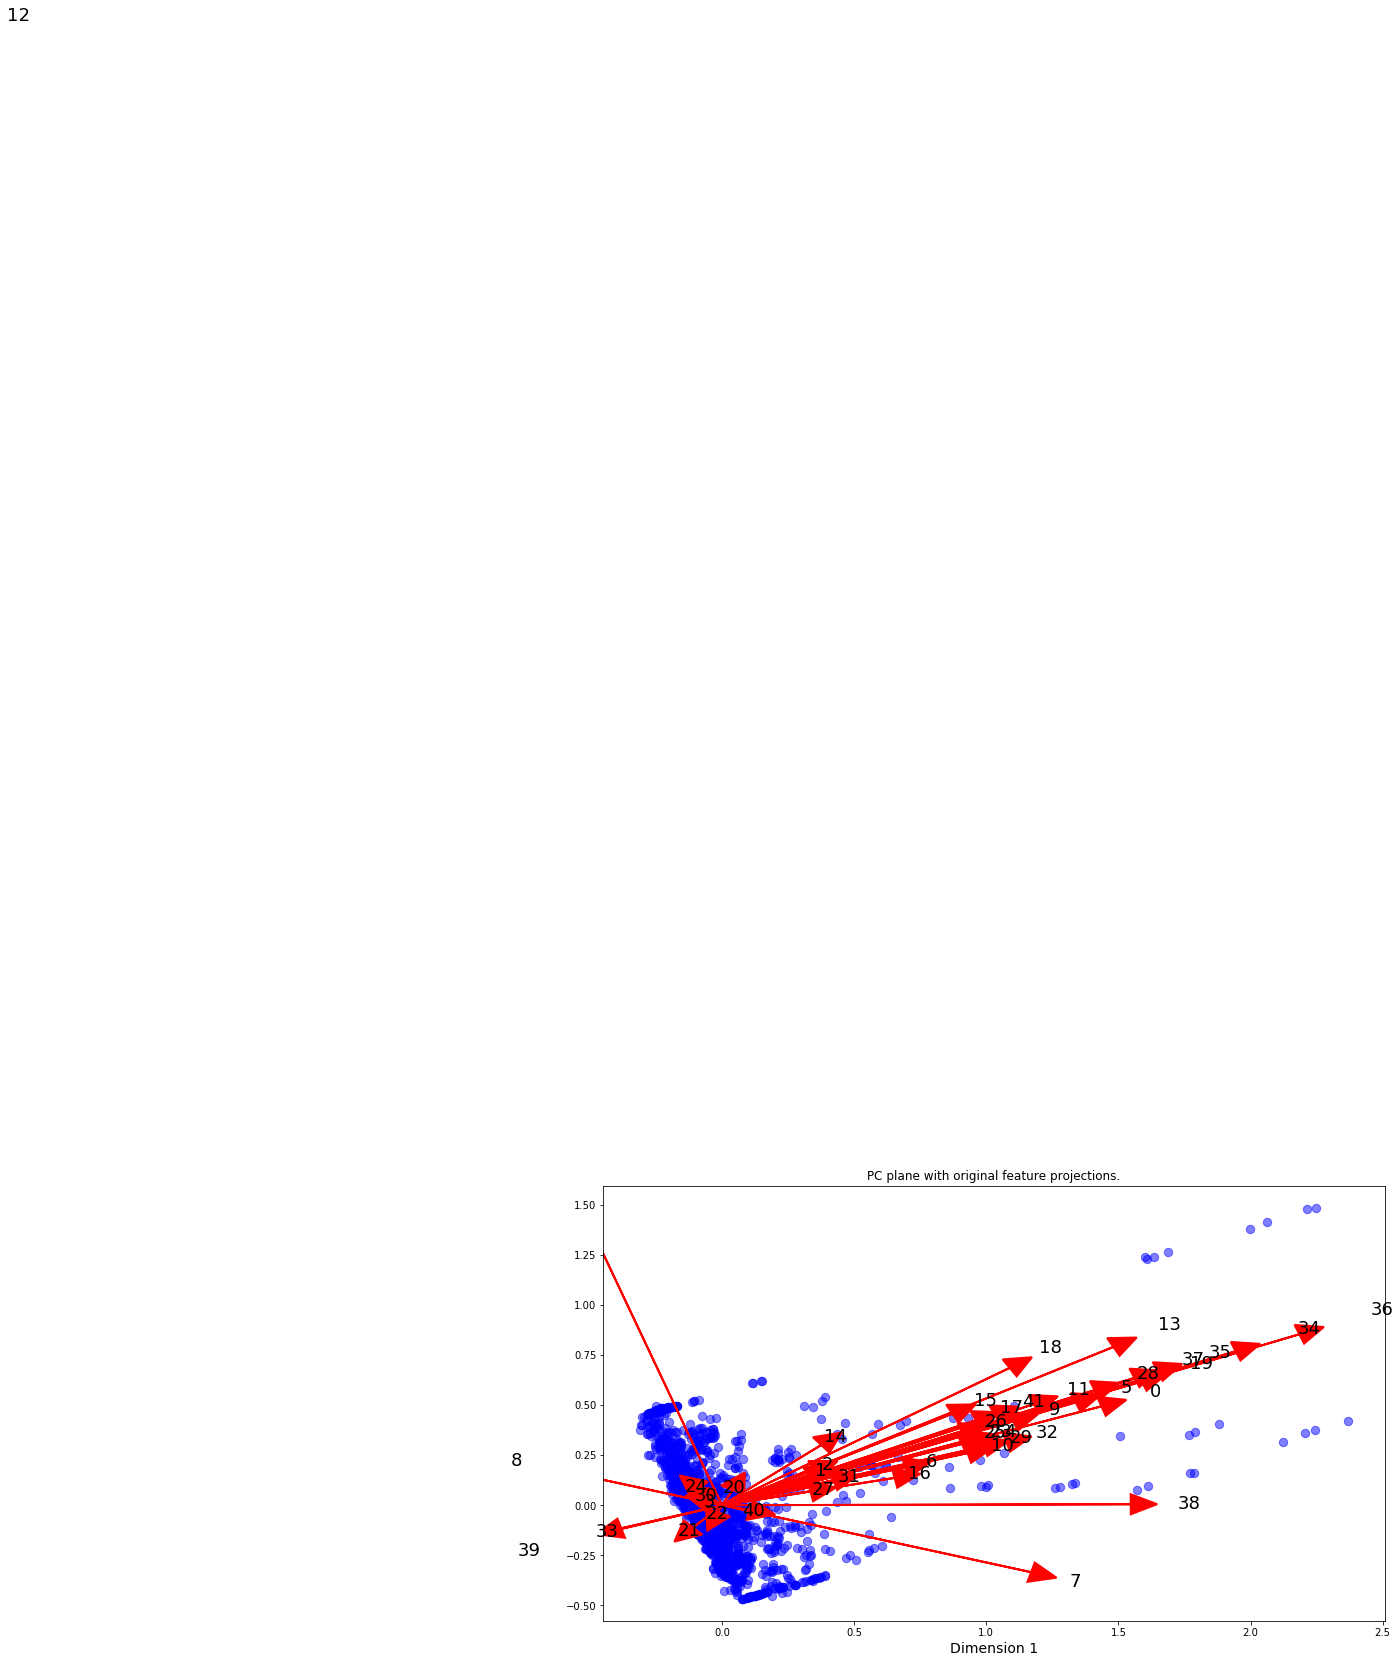

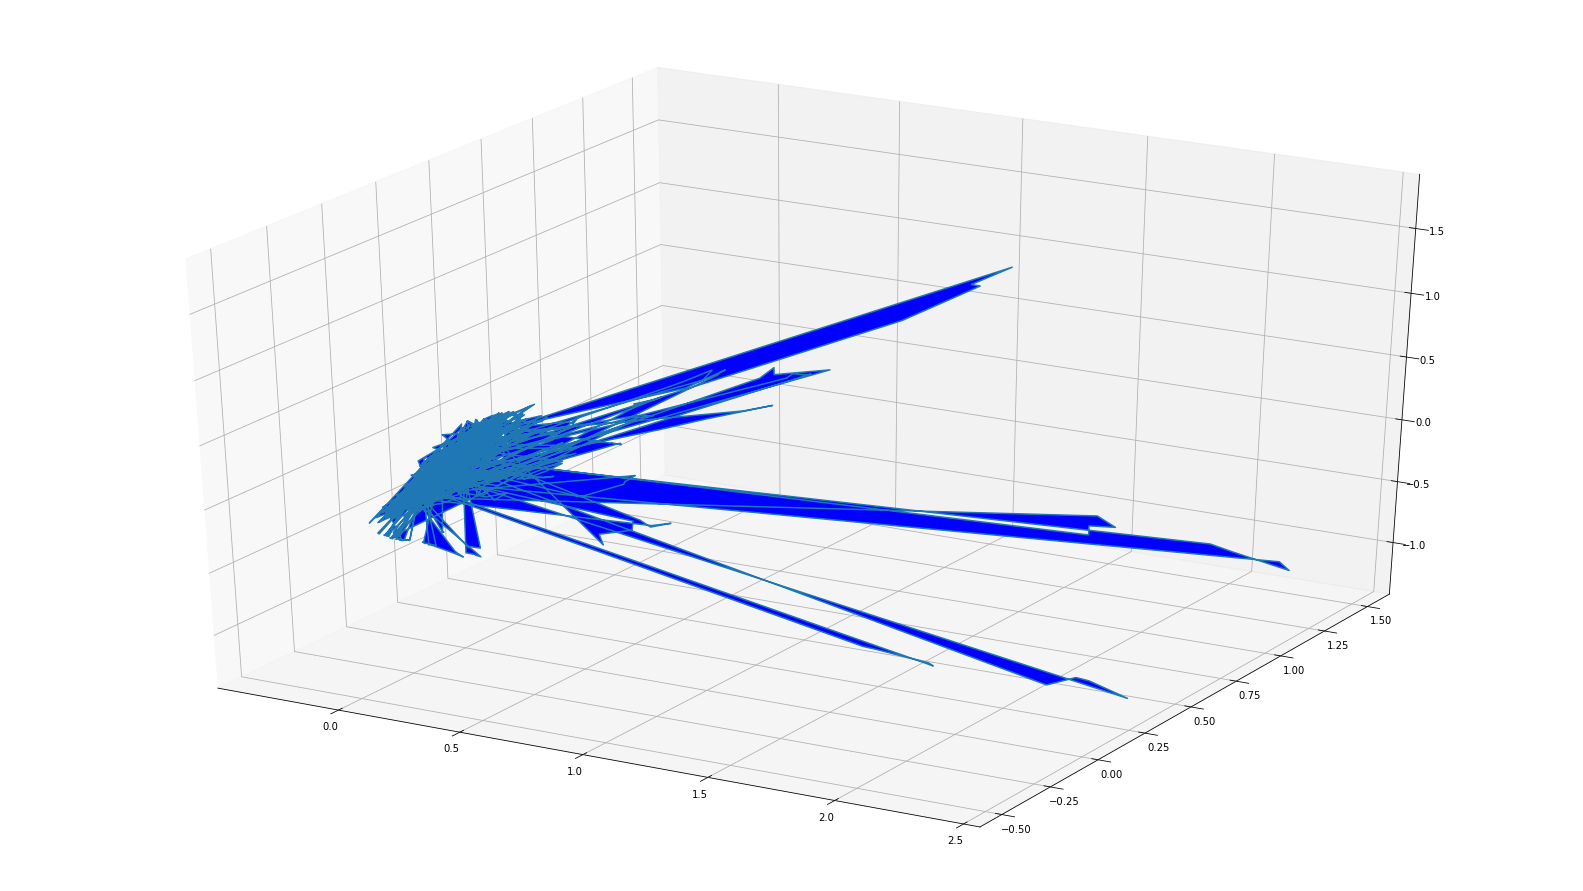

In [9]:
from mpl_toolkits.mplot3d import Axes3D

#function based on https://github.com/udacity/machine-learning/tree/master/projects/customer_segments
def biplot(good_data, reduced_data, pca):
    '''
    Original procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'],
               facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    #ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=12);
    return ax


# Create a biplot
biplot(fun, reduced_data, pca)

# Create 3D plot
fig = plt.figure(figsize = (28,16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X=reduced_data.loc[:, 'Dimension 1'], Y=reduced_data.loc[:, 'Dimension 2'], 
                      Z=reduced_data.loc[:, 'Dimension 3'], facecolors='b')

### Creating Clusters


In [10]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

#for loop was used to derermine # of clusters, score was compared
#Gaussian Mixture tested with undesirable outcomes

#for i in range(2,50):
n_clust = 4

#see score for different # of clusters
#for n_clust in range(2,12):

clusterer = KMeans(n_clusters=n_clust, random_state=42).fit(reduced_data)
#clusterer = GaussianMixture(n_components=n_clust, random_state=42).fit(reduced_data)


# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)


# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
#centers = clusterer.means_


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print(i, score)

3 0.479453366331


### Cluster Visualization


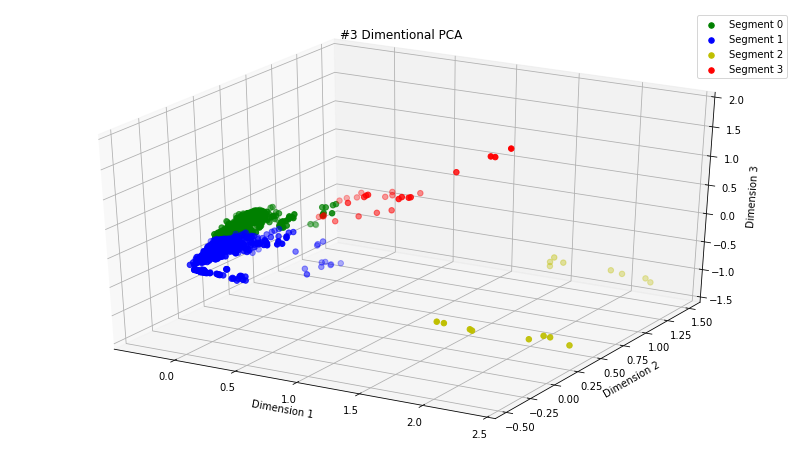

In [11]:
import matplotlib.cm as cm

#function based on https://github.com/udacity/machine-learning/tree/master/projects/customer_segments
def cluster_results(reduced_data, preds, centers):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    #fig, ax = plt.subplots(figsize = (14,8))
    fig = plt.figure(figsize = (14,8))
    ax=fig.add_subplot(111, projection='3d')

    # Color map
    cmap = cm.get_cmap('gist_rainbow')
    col = ['r','g','b','y']
    # Color the points based on assigned cluster
    ar='begin'
    for i, cluster in plot_data.groupby('Cluster'):
        #cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', z = 'Dimension 3',  \
        #             color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
        for j in cluster:
            if j == 'Cluster':
                if ar == 'begin':
                    ar=[]
                else:
                    ax.scatter(xs = ar[0], ys = ar[1], zs = ar[2], \
                           color = col[i], label = 'Segment %i'%(i-1), s=30);
                    
                    ar=[]
                    i+=1
            else:
                ar.append(cluster[j])
        
    ax.scatter(xs = ar[0], ys = ar[1], zs = ar[2], \
                           color = 'r', label = 'Segment %i'%(i-1), s=30);
    
    #for i, c in enumerate(centers):
    #    ax.scatter(xs = c[0], ys = c[1], zs = c[2], color = 'white', edgecolors = 'black', \
    #               alpha = 1, linewidth = 2, marker = 'o', s=200);
    #    ax.scatter(xs = c[0], ys = c[1], zs = c[2], marker='$%d$'%(i), alpha = 1, s=100);
    
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.legend()
    # Set plot title
    ax.set_title("#3 Dimentional PCA");

    
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers)


In [13]:
#Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers, columns = fun.keys())
true_centers.index = segments


pd.options.display.max_columns = None
display(true_centers)

#tipycal representatives of the segments

0         1         2         3         4         5   \
Segment 0  1.011001  1.008879  1.011425  1.008871  1.029028  1.000690   
Segment 1  1.018231  1.007687  1.007131  1.006945  1.025337  1.008806   
Segment 2  1.726530  1.109696  1.021638  0.996852  0.996394  2.016576   
Segment 3  1.206070  1.074995  1.166079  1.002248  1.573938  1.008029   

                 6         7         8         9         10        11  \
Segment 0  1.002860  1.004844  1.160762  1.047363  1.028143  1.032065   
Segment 1  1.009483  1.044541  1.128411  1.043552  1.027910  1.031231   
Segment 2  1.314696  0.998479  0.901440  1.167453  1.005159  1.539346   
Segment 3  1.077723  1.566152  1.099042  1.530230  1.539972  1.240245   

                 12        13        14        15        16        17  \
Segment 0  2.043596  1.130171  1.019804  1.013185  1.000514  1.009856   
Segment 1  1.339730  1.111898  1.009403  1.010034  1.010305  1.010423   
Segment 2  1.656960  1.418367  1.067849  1.514346  1.357434  1.529021   
Segment 3  1.529233  1.792260  1.164949  1.072536  1.025489  1.093088   

                 18        19        20        21        22        23  \
Segment 0  1.020497  1.001267  1.053264  1.951667  1.583308  1.380028   
Segment 1  1.009108  1.010376  1.049247  1.955456  1.586036  1.381279   
Segment 2  1.637612  2.295440  1.049399  1.733056  1.578107  1.673372   
Segment 3  1.130493  1.012252  1.078872  2.037801  1.573783  1.744957   

                 24        25        26        27        28        29  \
Segment 0  2.179019  1.375042  1.008001  1.014422  1.000269  1.022098   
Segment 1  2.162217  1.376008  1.012572  1.015858  1.007326  1.026456   
Segment 2  2.032725  1.648070  1.619494  1.008748  2.130333  1.273375   
Segment 3  2.237792  1.740464  1.015700  1.168664  0.996485  1.295858   

                 30        31        32        33        34        35  \
Segment 0  2.284629  1.007557  1.060409  2.475236  1.035601  1.010121   
Segment 1  2.278205  1.011453  1.064802  2.475375  1.035227  1.016023   
Segment 2  2.323685  1.207037  1.302102  2.445972  1.775447  2.183317   
Segment 3  2.212227  1.039826  1.409037  2.130868  1.535495  1.100093   

                 36        37        38        39        40        41  
Segment 0  1.082687  1.007605  1.016334  2.682435  1.775127  1.117818  
Segment 1  1.086372  1.013675  1.046222  2.683356  1.781022  1.115259  
Segment 2  2.286223  2.156799  1.191396  2.623793  1.792234  1.521779  
Segment 3  1.504837  1.065494  1.651427  2.090143  1.832083  1.357406

In [14]:
'''
preds - predicted classes
label - labels for dividend aristocrates
fundamentals - data
'''
#make sure we did not break the data
assert len(preds) == len(label)

#see what segment dividend arisrocrates belong to
#and if every organizarion belong only to 1 segment
arr=[]
for i in range(0,len(label)):
    if label[i] == 1:
        arr.append([fundamentals['Ticker Symbol'][i],preds[i]])
dic={}
for i in arr:
    if str(i) in dic:
        dic[str(i)]+=1
    else:
        dic[str(i)]=0

display (dic)


{"['ABBV', 0]": 3,
 "['ABT', 0]": 3,
 "['ADM', 1]": 3,
 "['AFL', 1]": 3,
 "['APD', 1]": 3,
 "['BCR', 0]": 3,
 "['BDX', 0]": 1,
 "['BDX', 1]": 1,
 "['CAH', 1]": 3,
 "['CINF', 1]": 3,
 "['CL', 0]": 3,
 "['CLX', 1]": 3,
 "['CTAS', 1]": 3,
 "['CVX', 3]": 3,
 "['DOV', 1]": 3,
 "['ECL', 1]": 3,
 "['ED', 1]": 3,
 "['EMR', 1]": 3,
 "['FRT', 0]": 3,
 "['GD', 1]": 3,
 "['GPC', 1]": 3,
 "['GWW', 1]": 3,
 "['HRL', 1]": 3,
 "['ITW', 1]": 3,
 "['KMB', 1]": 3,
 "['KO', 0]": 3,
 "['LEG', 1]": 3,
 "['LOW', 1]": 3,
 "['MCD', 1]": 3,
 "['MKC', 1]": 3,
 "['MMM', 1]": 3,
 "['NUE', 1]": 3,
 "['PEP', 0]": 3,
 "['PG', 0]": 3,
 "['PNR', 1]": 3,
 "['PPG', 1]": 3,
 "['SHW', 1]": 3,
 "['SWK', 1]": 3,
 "['SYY', 1]": 3,
 "['T', 3]": 3,
 "['TGT', 1]": 3,
 "['VFC', 1]": 3,
 "['WMT', 3]": 3,
 "['XOM', 3]": 3}

In [15]:
#total number of entries in each segment
print('In total in Segment 0 ',len([i for i in preds if i == 0]))
print('In total in Segment 1 ',len([i for i in preds if i == 1]))
print('In total in Segment 2 ',len([i for i in preds if i == 2]))
print('In total in Segment 3 ',len([i for i in preds if i == 3]))


In total in Segment 0  722
In total in Segment 1  1015
In total in Segment 2  16
In total in Segment 3  28


Explained Variance       0       1       2       3       4  \
Dimension 1               0.3025  0.2051  0.0465  0.0497 -0.0062  0.1359   
Dimension 2               0.2647  0.0706  0.0214  0.0252  0.0022  0.0459   
Dimension 3               0.1242 -0.0691  0.0115  0.0990  0.0005  0.3139   
Dimension 4               0.0524  0.0665  0.0132 -0.0061  0.0011 -0.0341   
Dimension 5               0.0390 -0.1189  0.0157  0.0320 -0.0012 -0.0811   
Dimension 6               0.0271 -0.1198 -0.0194  0.0155 -0.0086  0.0415   
Dimension 7               0.0238 -0.1190 -0.0571  0.1851 -0.0123  0.3785   
Dimension 8               0.0226  0.0015 -0.0231  0.1132  0.0065 -0.2458   
Dimension 9               0.0195  0.0354  0.0394 -0.0020  0.0194  0.0466   
Dimension 10              0.0140 -0.0101 -0.1770 -0.0811  0.0152  0.0071   
Dimension 11              0.0115  0.0275 -0.0404  0.0035  0.0401  0.0265   
Dimension 12              0.0108 -0.0953 -0.1082 -0.0310 -0.0143 -0.1005   
Dimension 13              0.0096  0.0344  0.0076 -0.0062  0.0241 -0.0177   
Dimension 14              0.0083 -0.0507 -0.1159  0.3514  0.1132  0.0455   
Dimension 15              0.0076  0.0190  0.1947  0.0465  0.4585 -0.1366   
Dimension 16              0.0071 -0.2153 -0.1757 -0.1387  0.3027  0.0842   
Dimension 17              0.0067  0.2066 -0.0226 -0.5622  0.4808  0.1327   
Dimension 18              0.0061  0.0238 -0.0626  0.4708  0.6354 -0.0324   
Dimension 19              0.0052  0.1198 -0.2072  0.3157 -0.0971 -0.1168   
Dimension 20              0.0047  0.1930  0.0337  0.0686 -0.1721  0.0556   
Dimension 21              0.0045  0.1929  0.2104  0.2098 -0.0502  0.0109   
Dimension 22              0.0040  0.1801 -0.2364 -0.1387 -0.0492 -0.0041   
Dimension 23              0.0035 -0.4778 -0.1299 -0.2117 -0.0071 -0.0650   
Dimension 24              0.0030  0.0084 -0.1444 -0.0141 -0.0363 -0.0589   
Dimension 25              0.0028  0.0042  0.0718 -0.0983 -0.0059 -0.2461   
Dimension 26              0.0025  0.1689  0.5102 -0.0829  0.0064  0.0016   
Dimension 27              0.0023  0.0093  0.1353 -0.0360 -0.0160 -0.1874   
Dimension 28              0.0020 -0.2431  0.1802  0.1042 -0.0036 -0.0224   
Dimension 29              0.0018 -0.0791  0.2544 -0.0382  0.0343 -0.3736   
Dimension 30              0.0015  0.1274 -0.0916 -0.0204  0.0017 -0.1953   
Dimension 31              0.0012 -0.2222  0.4009 -0.0028 -0.0041  0.4652   
Dimension 32              0.0010 -0.3444  0.2281  0.0487  0.0040 -0.2535   
Dimension 33              0.0007  0.2935 -0.0418  0.0019  0.0129 -0.0207   
Dimension 34              0.0007 -0.2201 -0.2587 -0.0063 -0.0019 -0.0237   
Dimension 35              0.0005  0.0511  0.0748  0.0383 -0.0041 -0.1590   
Dimension 36              0.0004 -0.0869  0.0221  0.0272 -0.0014 -0.0196   
Dimension 37              0.0003  0.1073 -0.0275 -0.0272 -0.0017  0.0456   
Dimension 38              0.0001 -0.0458  0.0130 -0.0051 -0.0013 -0.0046   
Dimension 39              0.0000 -0.0472 -0.0018 -0.0006  0.0006 -0.0080   
Dimension 40              0.0000 -0.0879  0.0053 -0.0060  0.0011 -0.0032   
Dimension 41              0.0000 -0.0065 -0.0049  0.0001  0.0002 -0.0009   
Dimension 42              0.0000  0.0000  0.0000 -0.0001  0.0000 -0.0003   

                   5       6       7       8       9      10      11      12  \
Dimension 1   0.1911  0.0991  0.1671 -0.0975  0.1574  0.1327  0.1685 -0.3328   
Dimension 2   0.0734  0.0271 -0.0477  0.0276  0.0599  0.0372  0.0721  0.9296   
Dimension 3  -0.2483 -0.0485  0.2991  0.0641  0.2313  0.2941 -0.0121  0.0581   
Dimension 4   0.0862  0.0888 -0.0201  0.9127 -0.0024 -0.0679  0.0732 -0.0601   
Dimension 5  -0.1449 -0.0892  0.1027  0.3500 -0.0832 -0.0939 -0.1531 -0.0004   
Dimension 6  -0.1014  0.1828 -0.3351  0.0004  0.2280 -0.0406  0.4937 -0.0669   
Dimension 7   0.0684 -0.0148 -0.3267  0.0666  0.1757  0.3748 -0.3130 -0.0351   
Dimension 8   0.0238  0.1589 -0.0656 -0.1019 -0.2630 -0.2308  0.0234  0.0206   
Dimension 9  -0.0231 -0.2

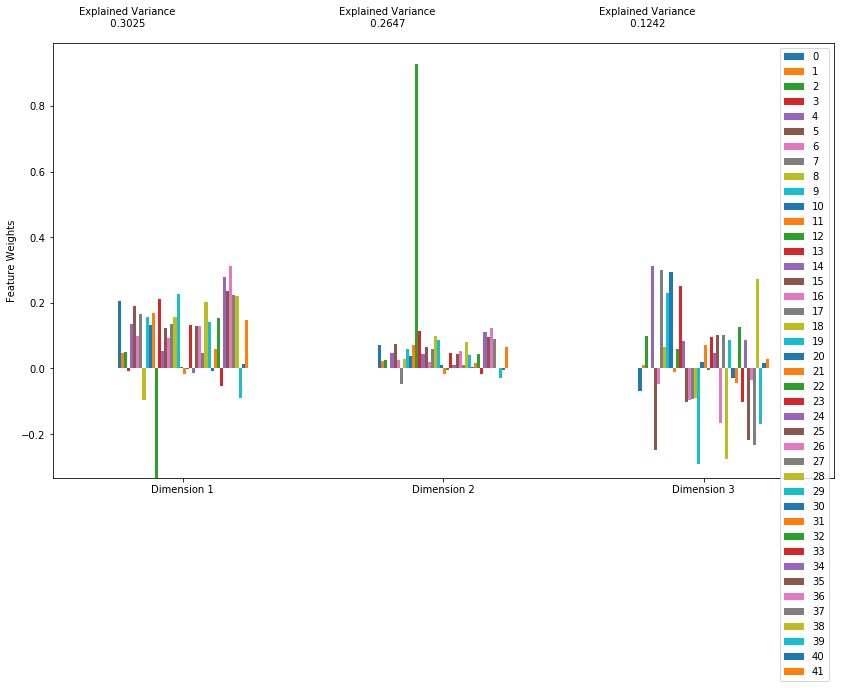

In [16]:
# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))




dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = fun.keys())

# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)


# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))



# Generate PCA results plot
display(pca_results)

## Conclusion